In [1]:
import os, sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import joblib

/tmp/ipykernel_354777/1361982687.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
pd.options.display.max_rows = 1000
pd.options.display.max_columns = 1000

# Load results

In [3]:
all_results_runtime = pd.read_csv('all_results_runtime.csv')
all_results = pd.read_csv('all_results_aucroc.csv')

In [4]:
dict_color = {"ARF":0,"LB":1,"LB_HT":2,"LR":3,"HAT":4,"HT":5,
              "r_TabSRA":6, "u_TabSRA":7,"r_EBM":8, "B_EBM":9, "r_XGBoost":10,
               "B_XGBoost":10,"DT":11
             }
dict_marker = {"ARF":'o',"LB":'o',"LB_HT":'o',"LR":'o',"HAT":'o',"HT":'o',
              "r_TabSRA":3, "u_TabSRA":4,"r_EBM":3, "B_EBM":4, "r_XGBoost":3,
               "B_XGBoost":4,"DT":3
             }
index = [7,6,0,11,2,5,4,8,3,9,1,10,12]

In [5]:
Vars = ['Batch_len']+['AVG_DELAY_'+str(i) for i in [0, 1000, 10000, 20000, 30000,40000,50000,60000,70000]]

## DELAY 0

In [6]:
res = all_results.groupby(['Dataset','Model'],as_index=False).agg({'AVG_DELAY_0':['mean','std']})
res.columns = ['Dataset','Model','AVG_DELAY_0','AVG_DELAY_0_std']
res_pivot = res.pivot(index='Model', columns='Dataset', values='AVG_DELAY_0')
res_pivot['Avg'] = res_pivot.mean(axis=1)
res_pivot['Avg_Normalized'] = (res_pivot.iloc[:,:5]/res_pivot.iloc[:,:5].max()).mean(axis=1)
res_pivot['Avg_rank'] = res_pivot.iloc[:,:5].rank(ascending=False).mean(axis=1)
res_pivot.iloc[:,:7] = res_pivot.iloc[:,:7]*100
res_pivot = np.round(res_pivot,2)
res_pivot_std = res.pivot(index='Model', columns='Dataset', values='AVG_DELAY_0_std')
res_pivot.iloc[index].style.background_gradient(cmap='coolwarm')

Dataset,AGR_a,AGR_g,HYPER_f,SEA_a,SEA_g,Avg,Avg_Normalized,Avg_rank
Model,,,,,,,,
LB_HT,94.540000,90.960000,93.410000,88.900000,88.870000,91.340000,98.010000,6.200000
LB,56.400000,55.920000,94.800000,88.830000,88.780000,76.940000,83.140000,9.000000
ARF,94.820000,92.120000,90.360000,88.920000,88.890000,91.020000,97.670000,6.000000
r_XGBoost,97.360000,96.250000,92.890000,88.800000,88.750000,92.810000,99.520000,5.400000
B_XGBoost,96.590000,95.910000,92.270000,88.890000,88.840000,92.500000,99.210000,5.800000
HT,86.500000,79.770000,65.800000,88.280000,88.240000,81.720000,87.920000,11.600000
HAT,93.860000,89.720000,89.980000,88.380000,88.210000,90.030000,96.620000,10.800000
LR,58.340000,58.120000,94.850000,88.900000,88.860000,77.820000,84.050000,7.000000
DT,96.120000,95.090000,86.520000,87.870000,87.740000,90.670000,97.250000,9.800000


## Detailled results: Agr_g

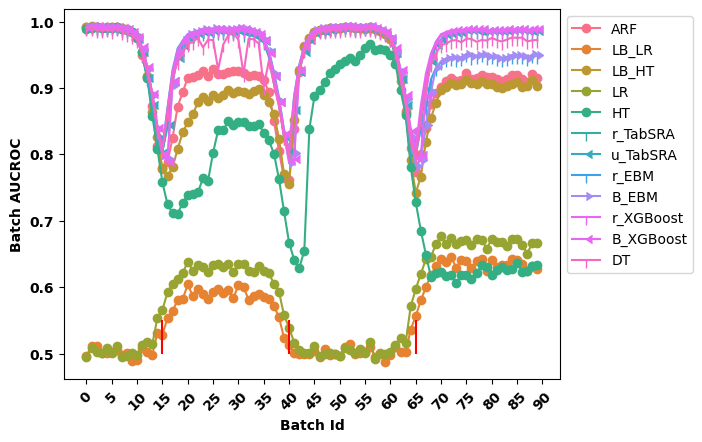

In [7]:
fig, ax = plt.subplots()
cm = sns.color_palette('husl', n_colors=12)  # a list of RGB tuples
ax.plot(range(90),all_results[(all_results.Dataset=='AGR_g')&(all_results.Model=='ARF')]['AVG_DELAY_0'], label='ARF',color=cm[dict_color.get('ARF')],marker=dict_marker.get('ARF'))
ax.plot(range(90),all_results[(all_results.Dataset=='AGR_g')&(all_results.Model=='LB')]['AVG_DELAY_0'], label='LB_LR',color=cm[dict_color.get('LB')],marker=dict_marker.get('LB'))
ax.plot(range(90),all_results[(all_results.Dataset=='AGR_g')&(all_results.Model=='LB_HT')]['AVG_DELAY_0'], label='LB_HT',color=cm[dict_color.get('LB_HT')],marker=dict_marker.get('LB_HT'))
ax.plot(range(90),all_results[(all_results.Dataset=='AGR_g')&(all_results.Model=='LR')]['AVG_DELAY_0'], label='LR',color=cm[dict_color.get('LR')],marker=dict_marker.get('LR'))
#ax.plot(range(90),all_results[(all_results.Dataset=='AGR_g')&(all_results.Model=='HAT')]['AVG_DELAY_0'],label='HAT',color=cm[dict_color.get('HAT')],marker=dict_marker.get('HAT'))
ax.plot(range(90),all_results[(all_results.Dataset=='AGR_g')&(all_results.Model=='HT')]['AVG_DELAY_0'],label='HT',color=cm[dict_color.get('HT')],marker=dict_marker.get('HT'))
ax.plot(range(90),all_results[(all_results.Dataset=='AGR_g')&(all_results.Model=='r_TabSRA')]['AVG_DELAY_0'], label='r_TabSRA',color=cm[dict_color.get('r_TabSRA')],marker=dict_marker.get('r_TabSRA'))
ax.plot(range(90),all_results[(all_results.Dataset=='AGR_g')&(all_results.Model=='u_TabSRA')]['AVG_DELAY_0'], label='u_TabSRA',color=cm[dict_color.get('u_TabSRA')],marker=dict_marker.get('u_TabSRA'))
ax.plot(range(90),all_results[(all_results.Dataset=='AGR_g')&(all_results.Model=='r_EBM')]['AVG_DELAY_0'], label='r_EBM',color=cm[dict_color.get('r_EBM')],marker=dict_marker.get('r_EBM'))
ax.plot(range(90),all_results[(all_results.Dataset=='AGR_g')&(all_results.Model=='B_EBM')]['AVG_DELAY_0'], label='B_EBM',color=cm[dict_color.get('B_EBM')],marker=dict_color.get('B_EBM'))
ax.plot(range(90),all_results[(all_results.Dataset=='AGR_g')&(all_results.Model=='r_XGBoost')]['AVG_DELAY_0'], label='r_XGBoost',color=cm[dict_color.get('r_XGBoost')],marker=dict_marker.get('r_XGBoost'))
ax.plot(range(90),all_results[(all_results.Dataset=='AGR_g')&(all_results.Model=='B_XGBoost')]['AVG_DELAY_0'], label='B_XGBoost',color=cm[dict_color.get('B_XGBoost')],marker=dict_marker.get('B_XGBoost'))
ax.plot(range(90),all_results[(all_results.Dataset=='AGR_g')&(all_results.Model=='DT')]['AVG_DELAY_0'], label='DT',color=cm[dict_color.get('DT')],marker=dict_marker.get('DT'))
plt.xlabel(r'Batch Id',weight = 'bold')
plt.ylabel(r'Batch AUCROC',weight = 'bold')
plt.xticks(ticks=list(np.arange(0, 91, 5)),rotation=45, weight = 'bold')
plt.yticks( weight = 'bold')
plt.vlines(x = [15,40, 65], ymin = 0.5, ymax = 0.55, color = 'r')
ax.legend(bbox_to_anchor=(1.00, 1.0), loc='upper left')
plt.savefig('AGR_g_DELAY_0.png',bbox_inches='tight')
#plt.show()

## Detailled results: Hyper_f

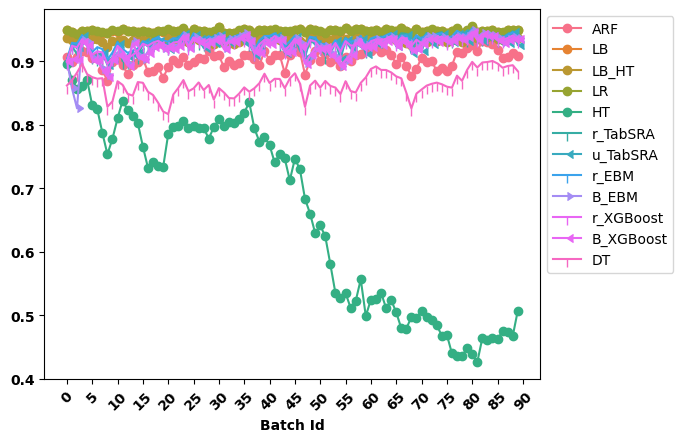

In [8]:
fig, ax = plt.subplots()
cm = sns.color_palette('husl', n_colors=12)  # a list of RGB tuples
ax.plot(range(90),all_results[(all_results.Dataset=='HYPER_f')&(all_results.Model=='ARF')]['AVG_DELAY_0'], label='ARF',color=cm[dict_color.get('ARF')],marker=dict_marker.get('ARF'))
ax.plot(range(90),all_results[(all_results.Dataset=='HYPER_f')&(all_results.Model=='LB')]['AVG_DELAY_0'], label='LB',color=cm[dict_color.get('LB')],marker=dict_marker.get('LB'))
ax.plot(range(90),all_results[(all_results.Dataset=='HYPER_f')&(all_results.Model=='LB_HT')]['AVG_DELAY_0'], label='LB_HT',color=cm[dict_color.get('LB_HT')],marker=dict_marker.get('LB_HT'))
ax.plot(range(90),all_results[(all_results.Dataset=='HYPER_f')&(all_results.Model=='LR')]['AVG_DELAY_0'], label='LR',color=cm[dict_color.get('LR')],marker=dict_marker.get('LR'))
#ax.plot(range(90),all_results[(all_results.Dataset=='HYPER_f')&(all_results.Model=='HAT')]['AVG_DELAY_0'],label='HAT',color=cm[dict_color.get('HAT')],marker=dict_marker.get('HAT'))
ax.plot(range(90),all_results[(all_results.Dataset=='HYPER_f')&(all_results.Model=='HT')]['AVG_DELAY_0'],label='HT',color=cm[dict_color.get('HT')],marker=dict_marker.get('HT'))
ax.plot(range(90),all_results[(all_results.Dataset=='HYPER_f')&(all_results.Model=='r_TabSRA')]['AVG_DELAY_0'], label='r_TabSRA',color=cm[dict_color.get('r_TabSRA')],marker=dict_marker.get('r_TabSRA'))
ax.plot(range(90),all_results[(all_results.Dataset=='HYPER_f')&(all_results.Model=='u_TabSRA')]['AVG_DELAY_0'], label='u_TabSRA',color=cm[dict_color.get('u_TabSRA')],marker=dict_marker.get('u_TabSRA'))
ax.plot(range(90),all_results[(all_results.Dataset=='HYPER_f')&(all_results.Model=='r_EBM')]['AVG_DELAY_0'], label='r_EBM',color=cm[dict_color.get('r_EBM')],marker=dict_marker.get('r_EBM'))
ax.plot(range(90),all_results[(all_results.Dataset=='HYPER_f')&(all_results.Model=='B_EBM')]['AVG_DELAY_0'], label='B_EBM',color=cm[dict_color.get('B_EBM')],marker=dict_color.get('B_EBM'))
ax.plot(range(90),all_results[(all_results.Dataset=='HYPER_f')&(all_results.Model=='r_XGBoost')]['AVG_DELAY_0'], label='r_XGBoost',color=cm[dict_color.get('r_XGBoost')],marker=dict_marker.get('r_XGBoost'))
ax.plot(range(90),all_results[(all_results.Dataset=='HYPER_f')&(all_results.Model=='B_XGBoost')]['AVG_DELAY_0'], label='B_XGBoost',color=cm[dict_color.get('B_XGBoost')],marker=dict_marker.get('B_XGBoost'))
ax.plot(range(90),all_results[(all_results.Dataset=='HYPER_f')&(all_results.Model=='DT')]['AVG_DELAY_0'], label='DT',color=cm[dict_color.get('DT')],marker=dict_marker.get('DT'))
plt.xlabel(r'Batch Id',weight = 'bold')
#plt.ylabel(r'Batch AUCROC',weight = 'bold')
plt.xticks(ticks=list(np.arange(0, 91, 5)),rotation=45, weight = 'bold')
plt.yticks( weight = 'bold')
#plt.vlines(x = [15,40, 65], ymin = 0.8, ymax = 0.81, color = 'r')
ax.legend(bbox_to_anchor=(1.00, 1.0), loc='upper left')
plt.savefig('HYPER_f_DELAY_0.png',bbox_inches='tight')
#plt.show()

# Impact of the label delay

## Average delay=1000 instances

In [9]:
res = all_results.groupby(['Dataset','Model'],as_index=False).agg({'AVG_DELAY_1000':['mean','std']})
res.columns = ['Dataset','Model','AVG_DELAY_1000','AVG_DELAY_1000_std']
res_pivot = res.pivot(index='Model', columns='Dataset', values='AVG_DELAY_1000')
res_pivot['Avg'] = res_pivot.mean(axis=1)
res_pivot['Avg_Normalized'] = (res_pivot.iloc[:,:5]/res_pivot.iloc[:,:5].max()).mean(axis=1)
res_pivot['Avg_rank'] = res_pivot.iloc[:,:5].rank(ascending=False).mean(axis=1)
res_pivot.iloc[:,:7] = res_pivot.iloc[:,:7]*100
res_pivot = np.round(res_pivot,2)
res_pivot_std = res.pivot(index='Model', columns='Dataset', values='AVG_DELAY_1000_std')
res_pivot.iloc[index].style.background_gradient(cmap='coolwarm')

Dataset,AGR_a,AGR_g,HYPER_f,SEA_a,SEA_g,Avg,Avg_Normalized,Avg_rank
Model,,,,,,,,
LB_HT,94.320000,90.530000,93.260000,88.890000,88.890000,91.180000,97.920000,6.200000
LB,56.200000,55.860000,94.630000,88.840000,88.790000,76.860000,83.120000,9.000000
ARF,95.170000,92.290000,90.140000,88.930000,88.890000,91.080000,97.810000,6.200000
r_XGBoost,97.100000,96.270000,92.740000,88.800000,88.770000,92.730000,99.530000,5.400000
B_XGBoost,96.450000,95.910000,92.130000,88.900000,88.850000,92.450000,99.230000,5.600000
HT,87.700000,79.740000,65.840000,88.330000,88.280000,81.980000,88.260000,11.600000
HAT,95.330000,89.060000,90.710000,88.530000,88.200000,90.370000,97.050000,10.000000
LR,58.320000,58.090000,94.680000,88.910000,88.860000,77.770000,84.070000,6.800000
DT,95.820000,94.790000,86.430000,87.900000,87.740000,90.540000,97.190000,10.000000


## Average delay=10000 instances

In [10]:
res = all_results.groupby(['Dataset','Model'],as_index=False).agg({'AVG_DELAY_10000':['mean','std']})
res.columns = ['Dataset','Model','AVG_DELAY_10000','AVG_DELAY_10000_std']
res_pivot = res.pivot(index='Model', columns='Dataset', values='AVG_DELAY_10000')
res_pivot['Avg'] = res_pivot.mean(axis=1)
res_pivot['Avg_Normalized'] = (res_pivot.iloc[:,:5]/res_pivot.iloc[:,:5].max()).mean(axis=1)
res_pivot['Avg_rank'] = res_pivot.iloc[:,:5].rank(ascending=False).mean(axis=1)
res_pivot.iloc[:,:7] = res_pivot.iloc[:,:7]*100
res_pivot = np.round(res_pivot,2)
res_pivot_std = res.pivot(index='Model', columns='Dataset', values='AVG_DELAY_10000_std')
res_pivot.iloc[index].style.background_gradient(cmap='coolwarm')

Dataset,AGR_a,AGR_g,HYPER_f,SEA_a,SEA_g,Avg,Avg_Normalized,Avg_rank
Model,,,,,,,,
LB_HT,92.210000,89.700000,91.900000,88.900000,88.900000,90.320000,97.730000,5.600000
LB,56.060000,55.890000,93.110000,88.840000,88.800000,76.540000,83.340000,8.800000
ARF,93.210000,91.670000,89.070000,88.930000,88.880000,90.350000,97.750000,6.200000
r_XGBoost,95.700000,95.740000,91.330000,88.710000,88.740000,92.040000,99.520000,5.200000
B_XGBoost,94.900000,95.210000,90.830000,88.870000,88.830000,91.730000,99.200000,5.400000
HT,85.210000,79.150000,65.660000,88.380000,88.350000,81.350000,88.190000,11.600000
HAT,93.160000,88.870000,88.930000,88.520000,88.300000,89.550000,96.900000,10.400000
LR,57.990000,58.120000,93.150000,88.910000,88.870000,77.410000,84.250000,6.400000
DT,94.420000,94.330000,85.290000,87.750000,87.650000,89.890000,97.200000,9.800000


## Average delay=20000 instances

In [11]:
res = all_results.groupby(['Dataset','Model'],as_index=False).agg({'AVG_DELAY_20000':['mean','std']})
res.columns = ['Dataset','Model','AVG_DELAY_20000','AVG_DELAY_20000_std']
res_pivot = res.pivot(index='Model', columns='Dataset', values='AVG_DELAY_20000')
res_pivot['Avg'] = res_pivot.mean(axis=1)
res_pivot['Avg_Normalized'] = (res_pivot.iloc[:,:5]/res_pivot.iloc[:,:5].max()).mean(axis=1)
res_pivot['Avg_rank'] = res_pivot.iloc[:,:5].rank(ascending=False).mean(axis=1)
res_pivot.iloc[:,:7] = res_pivot.iloc[:,:7]*100
res_pivot = np.round(res_pivot,2)
res_pivot_std = res.pivot(index='Model', columns='Dataset', values='AVG_DELAY_20000_std')
res_pivot.iloc[index].style.background_gradient(cmap='coolwarm')

Dataset,AGR_a,AGR_g,HYPER_f,SEA_a,SEA_g,Avg,Avg_Normalized,Avg_rank
Model,,,,,,,,
LB_HT,90.770000,89.370000,90.540000,88.900000,88.900000,89.690000,97.890000,6.000000
LB,55.900000,55.920000,91.630000,88.850000,88.800000,76.220000,83.620000,8.800000
ARF,92.150000,91.070000,88.220000,88.930000,88.900000,89.850000,98.040000,5.600000
r_XGBoost,94.000000,94.920000,90.000000,88.730000,88.750000,91.280000,99.560000,5.200000
B_XGBoost,93.220000,94.180000,89.570000,88.900000,88.830000,90.940000,99.200000,5.200000
HT,85.180000,77.530000,65.450000,88.350000,88.330000,80.970000,88.480000,11.200000
HAT,90.020000,89.220000,87.910000,88.320000,88.320000,88.760000,96.860000,10.800000
LR,57.800000,58.050000,91.670000,88.920000,88.880000,77.070000,84.520000,6.400000
DT,92.840000,93.680000,84.110000,87.630000,87.610000,89.170000,97.260000,9.800000


## Average delay=30000 instances

In [12]:
res = all_results.groupby(['Dataset','Model'],as_index=False).agg({'AVG_DELAY_30000':['mean','std']})
res.columns = ['Dataset','Model','AVG_DELAY_30000','AVG_DELAY_30000_std']
res_pivot = res.pivot(index='Model', columns='Dataset', values='AVG_DELAY_30000')
res_pivot['Avg'] = res_pivot.mean(axis=1)
res_pivot['Avg_Normalized'] = (res_pivot.iloc[:,:5]/res_pivot.iloc[:,:5].max()).mean(axis=1)
res_pivot['Avg_rank'] = res_pivot.iloc[:,:5].rank(ascending=False).mean(axis=1)
res_pivot.iloc[:,:7] = res_pivot.iloc[:,:7]*100
res_pivot = np.round(res_pivot,2)
res_pivot_std = res.pivot(index='Model', columns='Dataset', values='AVG_DELAY_30000_std')
res_pivot.iloc[index].style.background_gradient(cmap='coolwarm')

Dataset,AGR_a,AGR_g,HYPER_f,SEA_a,SEA_g,Avg,Avg_Normalized,Avg_rank
Model,,,,,,,,
LB_HT,89.350000,88.010000,89.350000,88.930000,88.900000,88.910000,97.860000,5.200000
LB,55.600000,55.630000,90.420000,88.840000,88.790000,75.850000,83.840000,8.600000
ARF,90.590000,89.840000,87.250000,88.930000,88.890000,89.100000,98.050000,5.800000
r_XGBoost,92.300000,93.890000,88.770000,88.710000,88.670000,90.470000,99.520000,5.200000
B_XGBoost,91.580000,93.040000,88.400000,88.880000,88.800000,90.140000,99.170000,5.400000
HT,82.420000,77.290000,65.260000,88.350000,88.330000,80.330000,88.490000,11.200000
HAT,89.530000,87.950000,86.460000,88.280000,88.190000,88.080000,96.940000,10.600000
LR,57.340000,57.840000,90.460000,88.910000,88.870000,76.680000,84.730000,6.800000
DT,91.180000,92.350000,82.920000,87.570000,87.430000,88.290000,97.120000,9.800000


## Average delay=40000 instances

In [13]:
res = all_results.groupby(['Dataset','Model'],as_index=False).agg({'AVG_DELAY_40000':['mean','std']})
res.columns = ['Dataset','Model','AVG_DELAY_40000','AVG_DELAY_40000_std']
res_pivot = res.pivot(index='Model', columns='Dataset', values='AVG_DELAY_40000')
res_pivot['Avg'] = res_pivot.mean(axis=1)
res_pivot['Avg_Normalized'] = (res_pivot.iloc[:,:5]/res_pivot.iloc[:,:5].max()).mean(axis=1)
res_pivot['Avg_rank'] = res_pivot.iloc[:,:5].rank(ascending=False).mean(axis=1)
res_pivot.iloc[:,:7] = res_pivot.iloc[:,:7]*100
res_pivot = np.round(res_pivot,2)
res_pivot_std = res.pivot(index='Model', columns='Dataset', values='AVG_DELAY_40000_std')
res_pivot.iloc[index].style.background_gradient(cmap='coolwarm')

Dataset,AGR_a,AGR_g,HYPER_f,SEA_a,SEA_g,Avg,Avg_Normalized,Avg_rank
Model,,,,,,,,
LB_HT,88.320000,86.890000,88.190000,88.910000,88.890000,88.240000,97.980000,5.600000
LB,55.440000,55.330000,89.200000,88.850000,88.790000,75.520000,84.110000,8.600000
ARF,89.430000,88.600000,86.070000,88.930000,88.890000,88.380000,98.120000,5.400000
r_XGBoost,90.770000,92.610000,87.640000,88.670000,88.670000,89.670000,99.530000,5.000000
B_XGBoost,90.020000,91.690000,87.360000,88.870000,88.810000,89.350000,99.180000,5.800000
HT,81.040000,76.350000,65.080000,88.310000,88.290000,79.810000,88.650000,11.200000
HAT,87.720000,84.930000,85.630000,88.110000,88.210000,86.920000,96.520000,10.600000
LR,57.160000,57.670000,89.240000,88.920000,88.870000,76.370000,85.040000,6.400000
DT,89.520000,91.440000,82.100000,87.300000,87.360000,87.550000,97.160000,9.800000


## Average delay=50000 instances

In [14]:
res = all_results.groupby(['Dataset','Model'],as_index=False).agg({'AVG_DELAY_50000':['mean','std']})
res.columns = ['Dataset','Model','AVG_DELAY_50000','AVG_DELAY_50000_std']
res_pivot = res.pivot(index='Model', columns='Dataset', values='AVG_DELAY_50000')
res_pivot['Avg'] = res_pivot.mean(axis=1)
res_pivot['Avg_Normalized'] = (res_pivot.iloc[:,:5]/res_pivot.iloc[:,:5].max()).mean(axis=1)
res_pivot['Avg_rank'] = res_pivot.iloc[:,:5].rank(ascending=False).mean(axis=1)
res_pivot.iloc[:,:7] = res_pivot.iloc[:,:7]*100
res_pivot = np.round(res_pivot,2)
res_pivot_std = res.pivot(index='Model', columns='Dataset', values='AVG_DELAY_50000_std')
res_pivot.iloc[index].style.background_gradient(cmap='coolwarm')

Dataset,AGR_a,AGR_g,HYPER_f,SEA_a,SEA_g,Avg,Avg_Normalized,Avg_rank
Model,,,,,,,,
LB_HT,86.930000,85.880000,87.160000,88.910000,88.920000,87.560000,98.080000,5.400000
LB,55.220000,55.230000,88.140000,88.850000,88.800000,75.240000,84.430000,8.400000
ARF,87.640000,86.860000,85.060000,88.910000,88.890000,87.470000,97.980000,6.000000
r_XGBoost,89.160000,91.260000,86.600000,88.670000,88.620000,88.860000,99.520000,5.000000
B_XGBoost,88.260000,90.320000,86.360000,88.870000,88.780000,88.520000,99.140000,5.800000
HT,80.430000,75.730000,64.900000,88.300000,88.280000,79.530000,89.080000,11.200000
HAT,88.140000,84.650000,83.690000,87.960000,88.200000,86.530000,96.930000,9.800000
LR,56.890000,57.530000,88.180000,88.910000,88.870000,76.080000,85.350000,6.200000
DT,87.870000,90.250000,81.190000,87.240000,87.250000,86.760000,97.150000,9.800000


## Average delay=60000 instances

In [15]:
res = all_results.groupby(['Dataset','Model'],as_index=False).agg({'AVG_DELAY_60000':['mean','std']})
res.columns = ['Dataset','Model','AVG_DELAY_60000','AVG_DELAY_60000_std']
res_pivot = res.pivot(index='Model', columns='Dataset', values='AVG_DELAY_60000')
res_pivot['Avg'] = res_pivot.mean(axis=1)
res_pivot['Avg_Normalized'] = (res_pivot.iloc[:,:5]/res_pivot.iloc[:,:5].max()).mean(axis=1)
res_pivot['Avg_rank'] = res_pivot.iloc[:,:5].rank(ascending=False).mean(axis=1)
res_pivot.iloc[:,:7] = res_pivot.iloc[:,:7]*100
res_pivot = np.round(res_pivot,2)
res_pivot_std = res.pivot(index='Model', columns='Dataset', values='AVG_DELAY_60000_std')
res_pivot.iloc[index].style.background_gradient(cmap='coolwarm')

Dataset,AGR_a,AGR_g,HYPER_f,SEA_a,SEA_g,Avg,Avg_Normalized,Avg_rank
Model,,,,,,,,
LB_HT,85.340000,84.890000,86.250000,88.940000,88.890000,86.860000,98.210000,4.600000
LB,54.890000,54.970000,87.180000,88.840000,88.800000,74.940000,84.750000,8.000000
ARF,86.110000,85.820000,84.170000,88.910000,88.890000,86.780000,98.110000,6.000000
r_XGBoost,87.340000,89.870000,85.740000,88.620000,88.580000,88.030000,99.520000,5.000000
B_XGBoost,86.650000,88.870000,85.400000,88.840000,88.760000,87.700000,99.150000,6.000000
HT,79.000000,74.920000,64.740000,88.280000,88.270000,79.040000,89.320000,11.200000
HAT,85.170000,83.690000,83.770000,88.010000,88.230000,85.770000,96.980000,10.600000
LR,56.490000,57.100000,87.210000,88.920000,88.870000,75.720000,85.630000,6.400000
DT,86.480000,88.530000,80.490000,86.980000,87.020000,85.900000,97.100000,9.800000


## Average delay=70000 instances

In [16]:
res = all_results.groupby(['Dataset','Model'],as_index=False).agg({'AVG_DELAY_70000':['mean','std']})
res.columns = ['Dataset','Model','AVG_DELAY_70000','AVG_DELAY_70000_std']
res_pivot = res.pivot(index='Model', columns='Dataset', values='AVG_DELAY_70000')
res_pivot['Avg'] = res_pivot.mean(axis=1)
res_pivot['Avg_Normalized'] = (res_pivot.iloc[:,:5]/res_pivot.iloc[:,:5].max()).mean(axis=1)
res_pivot['Avg_rank'] = res_pivot.iloc[:,:5].rank(ascending=False).mean(axis=1)
res_pivot.iloc[:,:7] = res_pivot.iloc[:,:7]*100
res_pivot = np.round(res_pivot,2)
res_pivot_std = res.pivot(index='Model', columns='Dataset', values='AVG_DELAY_70000_std')
res_pivot.iloc[index].style.background_gradient(cmap='coolwarm')

Dataset,AGR_a,AGR_g,HYPER_f,SEA_a,SEA_g,Avg,Avg_Normalized,Avg_rank
Model,,,,,,,,
LB_HT,84.080000,83.400000,85.400000,88.920000,88.910000,86.140000,98.290000,4.600000
LB,54.640000,54.760000,86.320000,88.840000,88.810000,74.670000,85.110000,8.400000
ARF,84.970000,84.800000,83.370000,88.910000,88.880000,86.190000,98.340000,6.000000
r_XGBoost,85.790000,88.180000,84.780000,88.630000,88.540000,87.180000,99.480000,5.000000
B_XGBoost,85.090000,87.100000,84.370000,88.870000,88.770000,86.840000,99.090000,6.000000
HT,78.090000,73.750000,64.580000,88.280000,88.260000,78.590000,89.590000,11.000000
HAT,79.980000,81.790000,82.820000,88.010000,88.080000,84.140000,95.980000,10.600000
LR,56.150000,56.870000,86.350000,88.910000,88.870000,75.430000,85.970000,6.400000
DT,85.080000,87.200000,79.590000,87.110000,86.800000,85.160000,97.160000,9.200000


## Visualization 

In [17]:
# Function x**(1/2)
def forward(x):
    return  x**5


def inverse(x):
    return x**(1/5)

In [18]:
res_delay = all_results.groupby(['Dataset','Model'],as_index=False).agg({
    'AVG_DELAY_0':'mean',
    'AVG_DELAY_1000':'mean',
    'AVG_DELAY_10000':'mean',
    'AVG_DELAY_20000':'mean',
    'AVG_DELAY_30000':'mean',
    'AVG_DELAY_40000':'mean',
    'AVG_DELAY_50000':'mean',
    'AVG_DELAY_60000':'mean',
    'AVG_DELAY_70000':'mean',
})
#res_delay = np.round(res_delay,2)
Delay_factor = [0, 0.1, 1, 2, 3, 4, 5, 6, 7]

### Agr_g

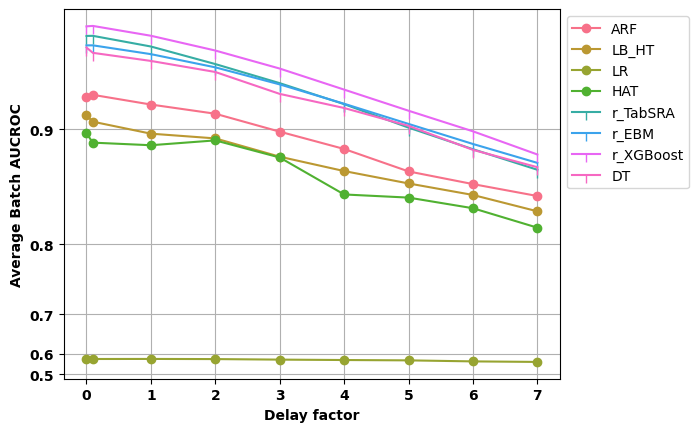

In [19]:
cm = sns.color_palette('husl', n_colors=12)  # a list of RGB tuples

plt.plot(Delay_factor,res_delay[(res_delay.Dataset=='AGR_g')&(res_delay.Model=='ARF')].iloc[:,2:].values.ravel(), label='ARF',color=cm[dict_color.get('ARF')], marker=dict_marker.get('ARF'))
#plt.plot(Delay_factor,res_delay[(res_delay.Dataset=='AGR_g')&(res_delay.Model=='LB')].iloc[:,2:].values.ravel(),  label='LB',color=cm[dict_color.get('LB')], marker=dict_marker.get('LB'))
plt.plot(Delay_factor,res_delay[(res_delay.Dataset=='AGR_g')&(res_delay.Model=='LB_HT')].iloc[:,2:].values.ravel(),  label='LB_HT',color=cm[dict_color.get('LB_HT')], marker=dict_marker.get('LB_HT'))
plt.plot(Delay_factor,res_delay[(res_delay.Dataset=='AGR_g')&(res_delay.Model=='LR')].iloc[:,2:].values.ravel(),  label='LR',color=cm[dict_color.get('LR')], marker=dict_marker.get('LR'))
plt.plot(Delay_factor,res_delay[(res_delay.Dataset=='AGR_g')&(res_delay.Model=='HAT')].iloc[:,2:].values.ravel(), label='HAT',color=cm[dict_color.get('HAT')], marker=dict_marker.get('HAT'))
#plt.plot(Delay_factor,res_delay[(res_delay.Dataset=='AGR_g')&(res_delay.Model=='HT')].iloc[:,2:].values.ravel(),  label='HT',color=cm[dict_color.get('HT')], marker=dict_marker.get('HT'))
plt.plot(Delay_factor,res_delay[(res_delay.Dataset=='AGR_g')&(res_delay.Model=='r_TabSRA')].iloc[:,2:].values.ravel(), label='r_TabSRA',color=cm[dict_color.get('r_TabSRA')], marker=dict_marker.get('r_TabSRA'))
#plt.plot(Delay_factor,res_delay[(res_delay.Dataset=='AGR_g')&(res_delay.Model=='u_TabSRA')].iloc[:,2:].values.ravel(),  label='u_TabSRA',color=cm[dict_color.get('u_TabSRA')], marker=dict_marker.get('u_TabSRA'))
plt.plot(Delay_factor,res_delay[(res_delay.Dataset=='AGR_g')&(res_delay.Model=='r_EBM')].iloc[:,2:].values.ravel(),  label='r_EBM',color=cm[dict_color.get('r_EBM')], marker=dict_marker.get('r_EBM'))
#plt.plot(Delay_factor,res_delay[(res_delay.Dataset=='AGR_g')&(res_delay.Model=='B_EBM')].iloc[:,2:].values.ravel(),  label='B_EBM',color=cm[dict_color.get('B_EBM')], marker=dict_marker.get('B_EBM'))


plt.plot(Delay_factor,res_delay[(res_delay.Dataset=='AGR_g')&(res_delay.Model=='r_XGBoost')].iloc[:,2:].values.ravel(), label='r_XGBoost',color=cm[dict_color.get('r_XGBoost')], marker=dict_marker.get('r_XGBoost'))
#plt.plot(Delay_factor,res_delay[(res_delay.Dataset=='AGR_g')&(res_delay.Model=='B_XGBoost')].iloc[:,2:].values.ravel(), label='B_XGBoost',color=cm[dict_color.get('ARF')], marker=dict_marker.get('B_XGBoost'))
plt.plot(Delay_factor,res_delay[(res_delay.Dataset=='AGR_g')&(res_delay.Model=='DT')].iloc[:,2:].values.ravel(),  label='DT',color=cm[dict_color.get('DT')], marker=dict_marker.get('DT'))
plt.yscale('function', functions=(forward, inverse))
plt.grid(True)
plt.xlabel(r'Delay factor',weight = 'bold')
plt.ylabel(r'Average Batch AUCROC',weight = 'bold')
#plt.xticks(ticks=Delay_factor,rotation=90, weight = 'bold')
plt.xticks(weight = 'bold')
plt.yticks( weight = 'bold')
plt.legend(bbox_to_anchor=(1.00, 1.0), loc='upper left')
#plt.legend()
plt.savefig('AGR_g_DELAY_Influence.png',bbox_inches='tight')
#plt.show()

### Agr_a

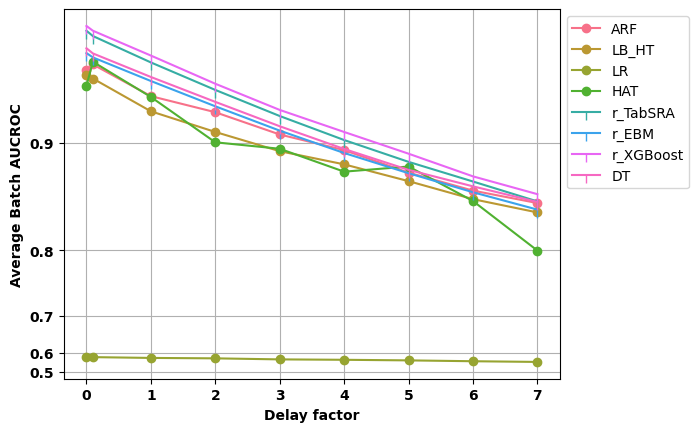

In [20]:
cm = sns.color_palette('husl', n_colors=12)  # a list of RGB tuples

plt.plot(Delay_factor,res_delay[(res_delay.Dataset=='AGR_a')&(res_delay.Model=='ARF')].iloc[:,2:].values.ravel(), label='ARF',color=cm[dict_color.get('ARF')], marker=dict_marker.get('ARF'))
#plt.plot(Delay_factor,res_delay[(res_delay.Dataset=='AGR_a')&(res_delay.Model=='LB')].iloc[:,2:].values.ravel(),  label='LB',color=cm[dict_color.get('LB')], marker=dict_marker.get('LB'))
plt.plot(Delay_factor,res_delay[(res_delay.Dataset=='AGR_a')&(res_delay.Model=='LB_HT')].iloc[:,2:].values.ravel(),  label='LB_HT',color=cm[dict_color.get('LB_HT')], marker=dict_marker.get('LB_HT'))
plt.plot(Delay_factor,res_delay[(res_delay.Dataset=='AGR_a')&(res_delay.Model=='LR')].iloc[:,2:].values.ravel(),  label='LR',color=cm[dict_color.get('LR')], marker=dict_marker.get('LR'))
plt.plot(Delay_factor,res_delay[(res_delay.Dataset=='AGR_a')&(res_delay.Model=='HAT')].iloc[:,2:].values.ravel(), label='HAT',color=cm[dict_color.get('HAT')], marker=dict_marker.get('HAT'))
#plt.plot(Delay_factor,res_delay[(res_delay.Dataset=='AGR_a')&(res_delay.Model=='HT')].iloc[:,2:].values.ravel(),  label='HT',color=cm[dict_color.get('HT')], marker=dict_marker.get('HT'))
plt.plot(Delay_factor,res_delay[(res_delay.Dataset=='AGR_a')&(res_delay.Model=='r_TabSRA')].iloc[:,2:].values.ravel(), label='r_TabSRA',color=cm[dict_color.get('r_TabSRA')], marker=dict_marker.get('r_TabSRA'))
#plt.plot(Delay_factor,res_delay[(res_delay.Dataset=='AGR_a')&(res_delay.Model=='u_TabSRA')].iloc[:,2:].values.ravel(),  label='u_TabSRA',color=cm[dict_color.get('u_TabSRA')], marker=dict_marker.get('u_TabSRA'))
plt.plot(Delay_factor,res_delay[(res_delay.Dataset=='AGR_a')&(res_delay.Model=='r_EBM')].iloc[:,2:].values.ravel(),  label='r_EBM',color=cm[dict_color.get('r_EBM')], marker=dict_marker.get('r_EBM'))
#plt.plot(Delay_factor,res_delay[(res_delay.Dataset=='AGR_a')&(res_delay.Model=='B_EBM')].iloc[:,2:].values.ravel(),  label='B_EBM',color=cm[dict_color.get('B_EBM')], marker=dict_marker.get('B_EBM'))


plt.plot(Delay_factor,res_delay[(res_delay.Dataset=='AGR_a')&(res_delay.Model=='r_XGBoost')].iloc[:,2:].values.ravel(), label='r_XGBoost',color=cm[dict_color.get('r_XGBoost')], marker=dict_marker.get('r_XGBoost'))
#plt.plot(Delay_factor,res_delay[(res_delay.Dataset=='AGR_a')&(res_delay.Model=='B_XGBoost')].iloc[:,2:].values.ravel(), label='B_XGBoost',color=cm[dict_color.get('ARF')], marker=dict_marker.get('B_XGBoost'))
plt.plot(Delay_factor,res_delay[(res_delay.Dataset=='AGR_a')&(res_delay.Model=='DT')].iloc[:,2:].values.ravel(),  label='DT',color=cm[dict_color.get('DT')], marker=dict_marker.get('DT'))
plt.yscale('function', functions=(forward, inverse))
plt.grid(True)
plt.xlabel(r'Delay factor',weight = 'bold')
plt.ylabel(r'Average Batch AUCROC',weight = 'bold')
#plt.xticks(ticks=Delay_factor,rotation=90, weight = 'bold')
plt.xticks(weight = 'bold')
plt.yticks( weight = 'bold')
plt.legend(bbox_to_anchor=(1.00, 1.0), loc='upper left')
#plt.legend()
plt.savefig('AGR_a_DELAY_Influence.png',bbox_inches='tight')
#plt.show()

### Hyper_f

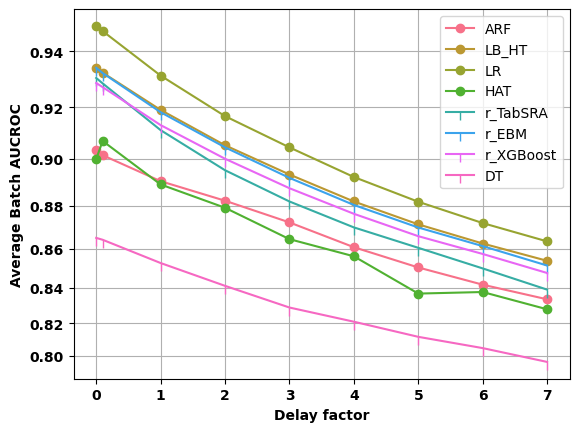

In [21]:
cm = sns.color_palette('husl', n_colors=12)  # a list of RGB tuples

plt.plot(Delay_factor,res_delay[(res_delay.Dataset=='HYPER_f')&(res_delay.Model=='ARF')].iloc[:,2:].values.ravel(), label='ARF',color=cm[dict_color.get('ARF')], marker=dict_marker.get('ARF'))
#plt.plot(Delay_factor,res_delay[(res_delay.Dataset=='HYPER_f')&(res_delay.Model=='LB')].iloc[:,2:].values.ravel(),  label='LB',color=cm[dict_color.get('LB')], marker=dict_marker.get('LB'))
plt.plot(Delay_factor,res_delay[(res_delay.Dataset=='HYPER_f')&(res_delay.Model=='LB_HT')].iloc[:,2:].values.ravel(),  label='LB_HT',color=cm[dict_color.get('LB_HT')], marker=dict_marker.get('LB_HT'))
plt.plot(Delay_factor,res_delay[(res_delay.Dataset=='HYPER_f')&(res_delay.Model=='LR')].iloc[:,2:].values.ravel(),  label='LR',color=cm[dict_color.get('LR')], marker=dict_marker.get('LR'))
plt.plot(Delay_factor,res_delay[(res_delay.Dataset=='HYPER_f')&(res_delay.Model=='HAT')].iloc[:,2:].values.ravel(), label='HAT',color=cm[dict_color.get('HAT')], marker=dict_marker.get('HAT'))
#plt.plot(Delay_factor,res_delay[(res_delay.Dataset=='HYPER_f')&(res_delay.Model=='HT')].iloc[:,2:].values.ravel(),  label='HT',color=cm[dict_color.get('HT')], marker=dict_marker.get('HT'))
plt.plot(Delay_factor,res_delay[(res_delay.Dataset=='HYPER_f')&(res_delay.Model=='r_TabSRA')].iloc[:,2:].values.ravel(), label='r_TabSRA',color=cm[dict_color.get('r_TabSRA')], marker=dict_marker.get('r_TabSRA'))
#plt.plot(Delay_factor,res_delay[(res_delay.Dataset=='HYPER_f')&(res_delay.Model=='u_TabSRA')].iloc[:,2:].values.ravel(),  label='u_TabSRA',color=cm[dict_color.get('u_TabSRA')], marker=dict_marker.get('u_TabSRA'))
plt.plot(Delay_factor,res_delay[(res_delay.Dataset=='HYPER_f')&(res_delay.Model=='r_EBM')].iloc[:,2:].values.ravel(),  label='r_EBM',color=cm[dict_color.get('r_EBM')], marker=dict_marker.get('r_EBM'))
#plt.plot(Delay_factor,res_delay[(res_delay.Dataset=='HYPER_f')&(res_delay.Model=='B_EBM')].iloc[:,2:].values.ravel(),  label='B_EBM',color=cm[dict_color.get('B_EBM')], marker=dict_marker.get('B_EBM'))
plt.plot(Delay_factor,res_delay[(res_delay.Dataset=='HYPER_f')&(res_delay.Model=='r_XGBoost')].iloc[:,2:].values.ravel(), label='r_XGBoost',color=cm[dict_color.get('r_XGBoost')], marker=dict_marker.get('r_XGBoost'))
#plt.plot(Delay_factor,res_delay[(res_delay.Dataset=='HYPER_f')&(res_delay.Model=='B_XGBoost')].iloc[:,2:].values.ravel(), label='B_XGBoost',color=cm[dict_color.get('ARF')], marker=dict_marker.get('B_XGBoost'))
plt.plot(Delay_factor,res_delay[(res_delay.Dataset=='HYPER_f')&(res_delay.Model=='DT')].iloc[:,2:].values.ravel(),  label='DT',color=cm[dict_color.get('DT')], marker=dict_marker.get('DT'))
plt.yscale('function', functions=(forward, inverse))
plt.grid(True)

plt.xlabel(r'Delay factor',weight = 'bold')
plt.ylabel(r'Average Batch AUCROC',weight = 'bold')
#plt.xticks(ticks=Delay_factor,rotation=90, weight = 'bold')
plt.xticks(weight = 'bold')
plt.yticks( weight = 'bold')
#plt.legend(bbox_to_anchor=(1.00, 1.0), loc='upper left')
plt.legend(bbox_to_anchor=(1.00, 1.0))
plt.savefig('HYPER_f_DELAY_Influence.png',bbox_inches='tight')
#plt.show()

### sea_g

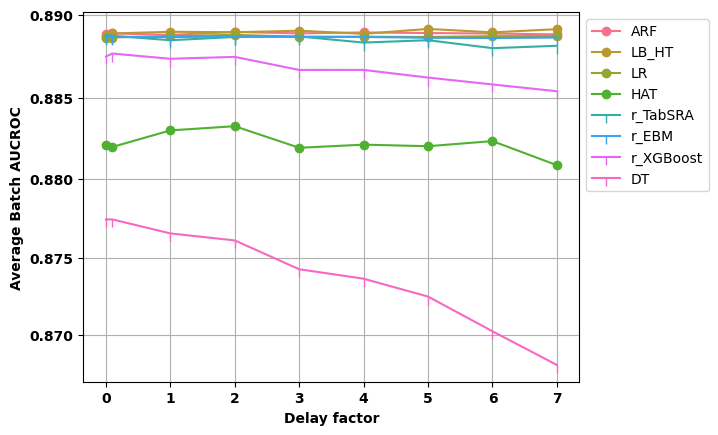

In [22]:
cm = sns.color_palette('husl', n_colors=12)  # a list of RGB tuples

plt.plot(Delay_factor,res_delay[(res_delay.Dataset=='SEA_g')&(res_delay.Model=='ARF')].iloc[:,2:].values.ravel(), label='ARF',color=cm[dict_color.get('ARF')], marker=dict_marker.get('ARF'))
#plt.plot(Delay_factor,res_delay[(res_delay.Dataset=='SEA_g')&(res_delay.Model=='LB')].iloc[:,2:].values.ravel(),  label='LB',color=cm[dict_color.get('LB')], marker=dict_marker.get('LB'))
plt.plot(Delay_factor,res_delay[(res_delay.Dataset=='SEA_g')&(res_delay.Model=='LB_HT')].iloc[:,2:].values.ravel(),  label='LB_HT',color=cm[dict_color.get('LB_HT')], marker=dict_marker.get('LB_HT'))
plt.plot(Delay_factor,res_delay[(res_delay.Dataset=='SEA_g')&(res_delay.Model=='LR')].iloc[:,2:].values.ravel(),  label='LR',color=cm[dict_color.get('LR')], marker=dict_marker.get('LR'))
plt.plot(Delay_factor,res_delay[(res_delay.Dataset=='SEA_g')&(res_delay.Model=='HAT')].iloc[:,2:].values.ravel(), label='HAT',color=cm[dict_color.get('HAT')], marker=dict_marker.get('HAT'))
#plt.plot(Delay_factor,res_delay[(res_delay.Dataset=='SEA_g')&(res_delay.Model=='HT')].iloc[:,2:].values.ravel(),  label='HT',color=cm[dict_color.get('HT')], marker=dict_marker.get('HT'))
plt.plot(Delay_factor,res_delay[(res_delay.Dataset=='SEA_g')&(res_delay.Model=='r_TabSRA')].iloc[:,2:].values.ravel(), label='r_TabSRA',color=cm[dict_color.get('r_TabSRA')], marker=dict_marker.get('r_TabSRA'))
#plt.plot(Delay_factor,res_delay[(res_delay.Dataset=='SEA_g')&(res_delay.Model=='u_TabSRA')].iloc[:,2:].values.ravel(),  label='u_TabSRA',color=cm[dict_color.get('u_TabSRA')], marker=dict_marker.get('u_TabSRA'))
plt.plot(Delay_factor,res_delay[(res_delay.Dataset=='SEA_g')&(res_delay.Model=='r_EBM')].iloc[:,2:].values.ravel(),  label='r_EBM',color=cm[dict_color.get('r_EBM')], marker=dict_marker.get('r_EBM'))
#plt.plot(Delay_factor,res_delay[(res_delay.Dataset=='SEA_g')&(res_delay.Model=='B_EBM')].iloc[:,2:].values.ravel(),  label='B_EBM',color=cm[dict_color.get('B_EBM')], marker=dict_marker.get('B_EBM'))
plt.plot(Delay_factor,res_delay[(res_delay.Dataset=='SEA_g')&(res_delay.Model=='r_XGBoost')].iloc[:,2:].values.ravel(), label='r_XGBoost',color=cm[dict_color.get('r_XGBoost')], marker=dict_marker.get('r_XGBoost'))
#plt.plot(Delay_factor,res_delay[(res_delay.Dataset=='SEA_g')&(res_delay.Model=='B_XGBoost')].iloc[:,2:].values.ravel(), label='B_XGBoost',color=cm[dict_color.get('ARF')], marker=dict_marker.get('B_XGBoost'))
plt.plot(Delay_factor,res_delay[(res_delay.Dataset=='SEA_g')&(res_delay.Model=='DT')].iloc[:,2:].values.ravel(),  label='DT',color=cm[dict_color.get('DT')], marker=dict_marker.get('DT'))
plt.yscale('function', functions=(forward, inverse))
plt.grid(True)
plt.xlabel(r'Delay factor',weight = 'bold')
plt.ylabel(r'Average Batch AUCROC',weight = 'bold')
#plt.xticks(ticks=Delay_factor,rotation=90, weight = 'bold')
plt.xticks(weight = 'bold')
plt.yticks( weight = 'bold')
plt.legend()
plt.legend(bbox_to_anchor=(1.00, 1.0), loc='upper left')
plt.savefig('SEA_g_DELAY_Influence.png',bbox_inches='tight')
#plt.show()

### sea_a

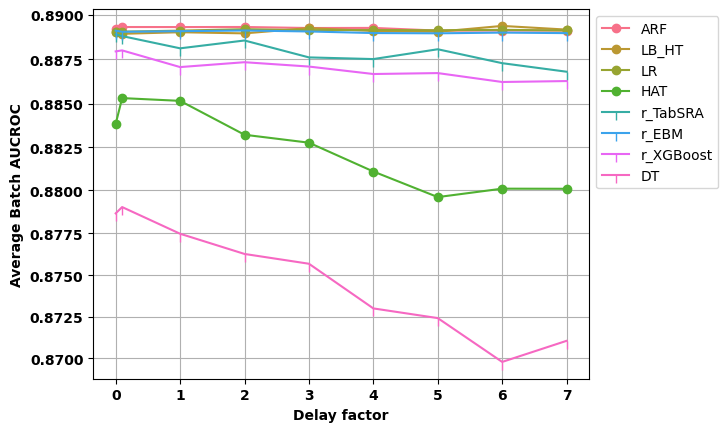

In [23]:
cm = sns.color_palette('husl', n_colors=12)  # a list of RGB tuples

plt.plot(Delay_factor,res_delay[(res_delay.Dataset=='SEA_a')&(res_delay.Model=='ARF')].iloc[:,2:].values.ravel(), label='ARF',color=cm[dict_color.get('ARF')], marker=dict_marker.get('ARF'))
#plt.plot(Delay_factor,res_delay[(res_delay.Dataset=='SEA_a')&(res_delay.Model=='LB')].iloc[:,2:].values.ravel(),  label='LB',color=cm[dict_color.get('LB')], marker=dict_marker.get('LB'))
plt.plot(Delay_factor,res_delay[(res_delay.Dataset=='SEA_a')&(res_delay.Model=='LB_HT')].iloc[:,2:].values.ravel(),  label='LB_HT',color=cm[dict_color.get('LB_HT')], marker=dict_marker.get('LB_HT'))
plt.plot(Delay_factor,res_delay[(res_delay.Dataset=='SEA_a')&(res_delay.Model=='LR')].iloc[:,2:].values.ravel(),  label='LR',color=cm[dict_color.get('LR')], marker=dict_marker.get('LR'))
plt.plot(Delay_factor,res_delay[(res_delay.Dataset=='SEA_a')&(res_delay.Model=='HAT')].iloc[:,2:].values.ravel(), label='HAT',color=cm[dict_color.get('HAT')], marker=dict_marker.get('HAT'))
#plt.plot(Delay_factor,res_delay[(res_delay.Dataset=='SEA_a')&(res_delay.Model=='HT')].iloc[:,2:].values.ravel(),  label='HT',color=cm[dict_color.get('HT')], marker=dict_marker.get('HT'))
plt.plot(Delay_factor,res_delay[(res_delay.Dataset=='SEA_a')&(res_delay.Model=='r_TabSRA')].iloc[:,2:].values.ravel(), label='r_TabSRA',color=cm[dict_color.get('r_TabSRA')], marker=dict_marker.get('r_TabSRA'))
#plt.plot(Delay_factor,res_delay[(res_delay.Dataset=='SEA_a')&(res_delay.Model=='u_TabSRA')].iloc[:,2:].values.ravel(),  label='u_TabSRA',color=cm[dict_color.get('u_TabSRA')], marker=dict_marker.get('u_TabSRA'))
plt.plot(Delay_factor,res_delay[(res_delay.Dataset=='SEA_a')&(res_delay.Model=='r_EBM')].iloc[:,2:].values.ravel(),  label='r_EBM',color=cm[dict_color.get('r_EBM')], marker=dict_marker.get('r_EBM'))
#plt.plot(Delay_factor,res_delay[(res_delay.Dataset=='SEA_a')&(res_delay.Model=='B_EBM')].iloc[:,2:].values.ravel(),  label='B_EBM',color=cm[dict_color.get('B_EBM')], marker=dict_marker.get('B_EBM'))


plt.plot(Delay_factor,res_delay[(res_delay.Dataset=='SEA_a')&(res_delay.Model=='r_XGBoost')].iloc[:,2:].values.ravel(), label='r_XGBoost',color=cm[dict_color.get('r_XGBoost')], marker=dict_marker.get('r_XGBoost'))
#plt.plot(Delay_factor,res_delay[(res_delay.Dataset=='SEA_a')&(res_delay.Model=='B_XGBoost')].iloc[:,2:].values.ravel(), label='B_XGBoost',color=cm[dict_color.get('ARF')], marker=dict_marker.get('B_XGBoost'))
plt.plot(Delay_factor,res_delay[(res_delay.Dataset=='SEA_a')&(res_delay.Model=='DT')].iloc[:,2:].values.ravel(),  label='DT',color=cm[dict_color.get('DT')], marker=dict_marker.get('DT'))
plt.yscale('function', functions=(forward, inverse))
plt.grid(True)
plt.xlabel(r'Delay factor',weight = 'bold')
plt.ylabel(r'Average Batch AUCROC',weight = 'bold')
#plt.xticks(ticks=Delay_factor,rotation=90, weight = 'bold')
plt.xticks(weight = 'bold')
plt.yticks( weight = 'bold')
plt.legend(bbox_to_anchor=(1.00, 1.0), loc='upper left')
plt.savefig('SEA_a_DELAY_Influence.png',bbox_inches='tight')
#plt.show()

## Detailed result Average delay=70000 instances

### Agr_g

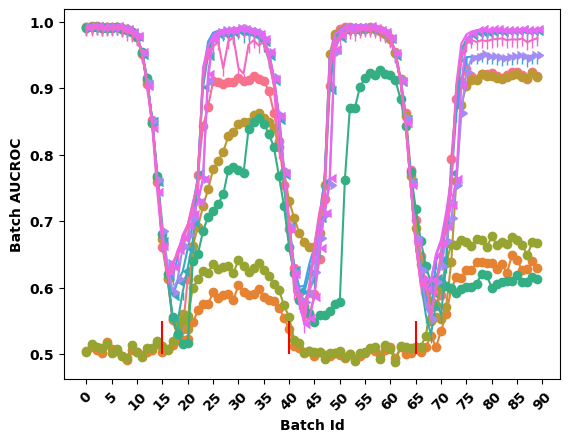

In [24]:
fig, ax = plt.subplots()
cm = sns.color_palette('husl', n_colors=12)  # a list of RGB tuples
ax.plot(range(90),all_results[(all_results.Dataset=='AGR_g')&(all_results.Model=='ARF')]['AVG_DELAY_70000'], label='ARF',color=cm[dict_color.get('ARF')],marker=dict_marker.get('ARF'))
ax.plot(range(90),all_results[(all_results.Dataset=='AGR_g')&(all_results.Model=='LB')]['AVG_DELAY_70000'], label='LB_LR',color=cm[dict_color.get('LB')],marker=dict_marker.get('LB'))
ax.plot(range(90),all_results[(all_results.Dataset=='AGR_g')&(all_results.Model=='LB_HT')]['AVG_DELAY_70000'], label='LB_HT',color=cm[dict_color.get('LB_HT')],marker=dict_marker.get('LB_HT'))
ax.plot(range(90),all_results[(all_results.Dataset=='AGR_g')&(all_results.Model=='LR')]['AVG_DELAY_70000'], label='LR',color=cm[dict_color.get('LR')],marker=dict_marker.get('LR'))
#ax.plot(range(90),all_results[(all_results.Dataset=='AGR_g')&(all_results.Model=='HAT')]['AVG_DELAY_70000'],label='HAT',color=cm[dict_color.get('HAT')],marker=dict_marker.get('HAT'))
ax.plot(range(90),all_results[(all_results.Dataset=='AGR_g')&(all_results.Model=='HT')]['AVG_DELAY_70000'],label='HT',color=cm[dict_color.get('HT')],marker=dict_marker.get('HT'))
ax.plot(range(90),all_results[(all_results.Dataset=='AGR_g')&(all_results.Model=='r_TabSRA')]['AVG_DELAY_70000'], label='r_TabSRA',color=cm[dict_color.get('r_TabSRA')],marker=dict_marker.get('r_TabSRA'))
ax.plot(range(90),all_results[(all_results.Dataset=='AGR_g')&(all_results.Model=='u_TabSRA')]['AVG_DELAY_70000'], label='u_TabSRA',color=cm[dict_color.get('u_TabSRA')],marker=dict_marker.get('u_TabSRA'))
ax.plot(range(90),all_results[(all_results.Dataset=='AGR_g')&(all_results.Model=='r_EBM')]['AVG_DELAY_70000'], label='r_EBM',color=cm[dict_color.get('r_EBM')],marker=dict_marker.get('r_EBM'))
ax.plot(range(90),all_results[(all_results.Dataset=='AGR_g')&(all_results.Model=='B_EBM')]['AVG_DELAY_70000'], label='B_EBM',color=cm[dict_color.get('B_EBM')],marker=dict_color.get('B_EBM'))
ax.plot(range(90),all_results[(all_results.Dataset=='AGR_g')&(all_results.Model=='r_XGBoost')]['AVG_DELAY_70000'], label='r_XGBoost',color=cm[dict_color.get('r_XGBoost')],marker=dict_marker.get('r_XGBoost'))
ax.plot(range(90),all_results[(all_results.Dataset=='AGR_g')&(all_results.Model=='B_XGBoost')]['AVG_DELAY_70000'], label='B_XGBoost',color=cm[dict_color.get('B_XGBoost')],marker=dict_marker.get('B_XGBoost'))
ax.plot(range(90),all_results[(all_results.Dataset=='AGR_g')&(all_results.Model=='DT')]['AVG_DELAY_70000'], label='DT',color=cm[dict_color.get('DT')],marker=dict_marker.get('DT'))
plt.xlabel(r'Batch Id',weight = 'bold')
plt.ylabel(r'Batch AUCROC',weight = 'bold')
plt.xticks(ticks=list(np.arange(0, 91, 5)),rotation=45, weight = 'bold')
plt.yticks( weight = 'bold')
plt.vlines(x = [15,40, 65], ymin = 0.5, ymax = 0.55, color = 'r')
#ax.legend(bbox_to_anchor=(1.00, 1.0), loc='upper left')
plt.savefig('AGR_g_DELAY_70000.png',bbox_inches='tight')
#plt.show()

### Hyper_f

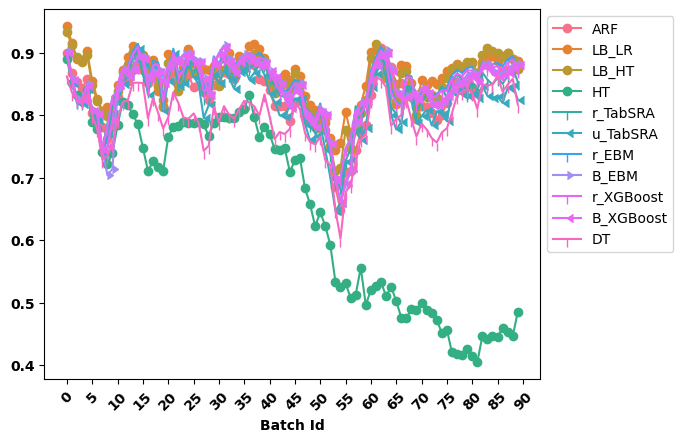

In [25]:
fig, ax = plt.subplots()
cm = sns.color_palette('husl', n_colors=12)  # a list of RGB tuples
ax.plot(range(90),all_results[(all_results.Dataset=='HYPER_f')&(all_results.Model=='ARF')]['AVG_DELAY_70000'], label='ARF',color=cm[dict_color.get('ARF')],marker=dict_marker.get('ARF'))
ax.plot(range(90),all_results[(all_results.Dataset=='HYPER_f')&(all_results.Model=='LB')]['AVG_DELAY_70000'], label='LB_LR',color=cm[dict_color.get('LB')],marker=dict_marker.get('LB'))
ax.plot(range(90),all_results[(all_results.Dataset=='HYPER_f')&(all_results.Model=='LB_HT')]['AVG_DELAY_70000'], label='LB_HT',color=cm[dict_color.get('LB_HT')],marker=dict_marker.get('LB_HT'))
#ax.plot(range(90),all_results[(all_results.Dataset=='HYPER_f')&(all_results.Model=='LR')]['AVG_DELAY_70000'], label='LR',color=cm[dict_color.get('LR')],marker=dict_marker.get('LR'))
#ax.plot(range(90),all_results[(all_results.Dataset=='HYPER_f')&(all_results.Model=='HAT')]['AVG_DELAY_70000'],label='HAT',color=cm[dict_color.get('HAT')],marker=dict_marker.get('HAT'))
ax.plot(range(90),all_results[(all_results.Dataset=='HYPER_f')&(all_results.Model=='HT')]['AVG_DELAY_70000'],label='HT',color=cm[dict_color.get('HT')],marker=dict_marker.get('HT'))
ax.plot(range(90),all_results[(all_results.Dataset=='HYPER_f')&(all_results.Model=='r_TabSRA')]['AVG_DELAY_70000'], label='r_TabSRA',color=cm[dict_color.get('r_TabSRA')],marker=dict_marker.get('r_TabSRA'))
ax.plot(range(90),all_results[(all_results.Dataset=='HYPER_f')&(all_results.Model=='u_TabSRA')]['AVG_DELAY_70000'], label='u_TabSRA',color=cm[dict_color.get('u_TabSRA')],marker=dict_marker.get('u_TabSRA'))
ax.plot(range(90),all_results[(all_results.Dataset=='HYPER_f')&(all_results.Model=='r_EBM')]['AVG_DELAY_70000'], label='r_EBM',color=cm[dict_color.get('r_EBM')],marker=dict_marker.get('r_EBM'))
ax.plot(range(90),all_results[(all_results.Dataset=='HYPER_f')&(all_results.Model=='B_EBM')]['AVG_DELAY_70000'], label='B_EBM',color=cm[dict_color.get('B_EBM')],marker=dict_color.get('B_EBM'))
ax.plot(range(90),all_results[(all_results.Dataset=='HYPER_f')&(all_results.Model=='r_XGBoost')]['AVG_DELAY_70000'], label='r_XGBoost',color=cm[dict_color.get('r_XGBoost')],marker=dict_marker.get('r_XGBoost'))
ax.plot(range(90),all_results[(all_results.Dataset=='HYPER_f')&(all_results.Model=='B_XGBoost')]['AVG_DELAY_70000'], label='B_XGBoost',color=cm[dict_color.get('B_XGBoost')],marker=dict_marker.get('B_XGBoost'))
ax.plot(range(90),all_results[(all_results.Dataset=='HYPER_f')&(all_results.Model=='DT')]['AVG_DELAY_70000'], label='DT',color=cm[dict_color.get('DT')],marker=dict_marker.get('DT'))
plt.xlabel(r'Batch Id',weight = 'bold')
#plt.ylabel(r'Batch AUCROC',weight = 'bold')
plt.xticks(ticks=list(np.arange(0, 91, 5)),rotation=45, weight = 'bold')
plt.yticks( weight = 'bold')
#plt.vlines(x = [15,40, 65], ymin = 0.8, ymax = 0.81, color = 'r')
ax.legend(bbox_to_anchor=(1.00, 1.0), loc='upper left')
plt.savefig('HYPER_f_DELAY_70000.png',bbox_inches='tight')
#plt.show()

# Runtime 

In [26]:
res_runtime = all_results_runtime.groupby('Model',as_index=False).agg({'runtime':['mean','std']})
res_runtime.columns = ["Model","Avg runtime","Std runtime"]
res_runtime.iloc[index].style.background_gradient(cmap='coolwarm')

,Model,Avg runtime,Std runtime
7,LB_HT,5837.582715,4428.626245
6,LB,7279.236584,4273.451684
0,ARF,3702.076545,2622.411206
11,r_XGBoost,1688.970797,210.530867
2,B_XGBoost,5101.621398,1186.928898
5,HT,60.069216,11.898368
4,HAT,248.200028,63.003248
8,LR,83.926330,29.067692
3,DT,976.935527,47.114825
9,r_EBM,1456.709243,403.828056
